## 1. Подключение библиотек

In [8]:
pip install pymorphy3

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
df_one =pd.read_csv("habr_parsing.csv")
df_two =pd.read_csv("json_dataset.csv")
df_three =pd.read_csv("PDF_dataset.csv")

In [11]:
df_two = df_two.drop(columns=['Unnamed: 0'])
df_three = df_three.drop(columns=['Unnamed: 0'])

In [12]:
df_one.columns = ['title', 'nameCompany', 'description', 'rating', 'field', 'date', 'textpub', 'views']
df_one.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN  
1    Пандемия, последствия которой до сих пор наб...    NaN  
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN  
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN  
4  Развитие информационных технологий — от первых...    NaN

In [13]:
df_two.columns = ['nameCompany', 'description', 'textpub', 'date', 'rating', 'views']
df_two.head()

nameCompany                                        description  \
0  Cybersport.Metaratings    Киберспортивное медиа и аналитическая платформа   
1         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
2         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
3         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   
4         ESforce Holding  Крупнейший холдинг в сфере киберспорта и игров...   

                                             textpub             date  rating  \
0  7 декабря состоялась церемония награждения лау...  8 декабря 09:30     6.0   
1  7 декабря состоялась церемония награждения лау...  8 декабря 09:30     6.0   
2  Из совместного исследования издателя компьютер...    29 июля 13:50    12.0   
3  По статистике The Esports Observer за I полови...     9 июля 09:33    18.0   
4  Компании SuperData Research и PayPal провели с...  11 апреля 12:43    11.0   

   views  
0   2300  
1   2300  
2   2800  
3   6200  
4  10000

In [14]:
df_three.columns = ['nameCompany', 'rating', 'date', 'description', 'textpub']
df_three.head()

nameCompany  rating        date  \
0               red_mad_robot  117.94  2025-03-21   
1  Технократия @technokratiya    4.40         NaN   
2                     Cloud4Y   71.07  2025-03-21   
3                      Kaiten   87.20  2025-03-27   
4                     Cloud4Y   71.07  2025-03-21   

                                       description  \
0     №1 в разработке цифровых решений для бизнеса   
1                                      ИТ-Компания   
2              #1 Корпоративный облачный провайдер   
3  Российский сервис для совместной работы команд.   
4              #1 Корпоративный облачный провайдер   

                                             textpub  
0  117.94\nРейтинг\nred_mad_robot\n№1 в разработк...  
1  Еще до начала MWC в Барселоне было очевидно, ч...  
2  71.07\nРейтинг\nCloud4Y\n#1 Корпоративный обла...  
3  87.2\nРейтинг\nKaiten\nРоссийский сервис для с...  
4  71.07\nРейтинг\nCloud4Y\n#1 Корпоративный обла...

In [15]:
df = pd.concat([df_one, df_two, df_three])
df = df.reset_index(drop=True)

In [16]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  views  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...    NaN  
1    Пандемия, последствия которой до сих пор наб...    NaN  
2  Привет! Я Диана, системный аналитик в Cleverte...    NaN  
3  Привет, Хабр. На связи команда Т1 Облако. Если...    NaN  
4  Развитие информационных технологий — от первых...    NaN

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        90 non-null     object 
 1   nameCompany  1225 non-null   object 
 2   description  1225 non-null   object 
 3   rating       1227 non-null   float64
 4   field        89 non-null     object 
 5   date         1224 non-null   object 
 6   textpub      1227 non-null   object 
 7   views        1112 non-null   float64
dtypes: float64(2), object(6)
memory usage: 76.8+ KB


In [18]:
df = df.drop('views', axis=1)

In [19]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...  
1    Пандемия, последствия которой до сих пор наб...  
2  Привет! Я Диана, системный аналитик в Cleverte...  
3  Привет, Хабр. На связи команда Т1 Облако. Если...  
4  Развитие информационных технологий — от первых...

## 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [20]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [21]:
df['text_new'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [22]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  
0  привет хабр меня зовут сергей арефьев я специа...  
1   пандемия последствия которой до сих пор наблю...  
2  привет я диана системный аналитик в clevertec ...  
3  привет хабр на связи команда т облако если вы ...  
4  развитие информационных технологий от первых а...

In [23]:
russian_stopwords = stopwords.words("russian") 
russian_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [24]:
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которая', 'с','своём','всем','наш', 'свой', 'ещё', "еще", "также", "так же", "всякий"]) 

In [25]:
def tokenize_text(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords and not re.search(r'[a-zA-Z]', token)]
    text = " ".join(tokens)
    return text

In [26]:
df['tokenize_texts'] = [tokenize_text(text) for text in df['text_new']]

In [27]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [28]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [29]:
%%time
lemm_texts_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
    
df['text_lemm'] = lemm_texts_list

CPU times: total: 1min 42s
Wall time: 1min 42s


In [30]:
df['text_lemm'] = [tokenize_text(text) for text in df['text_lemm']]

# Облако слов

In [31]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

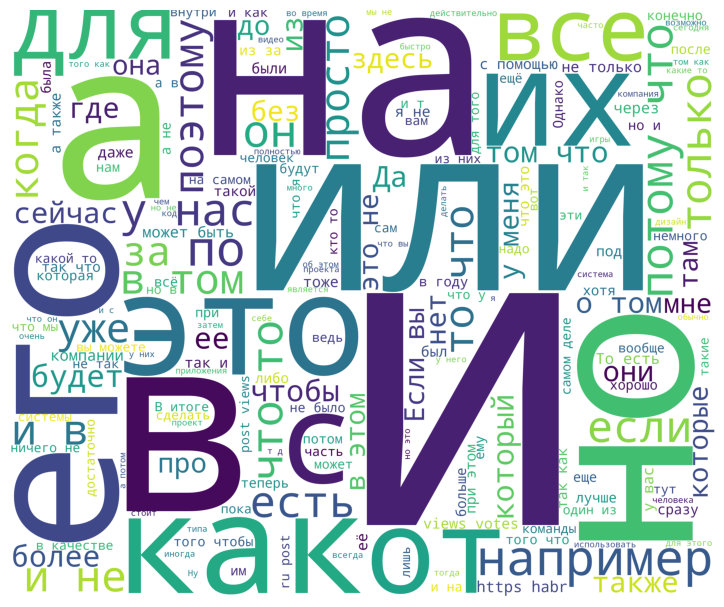

In [34]:
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

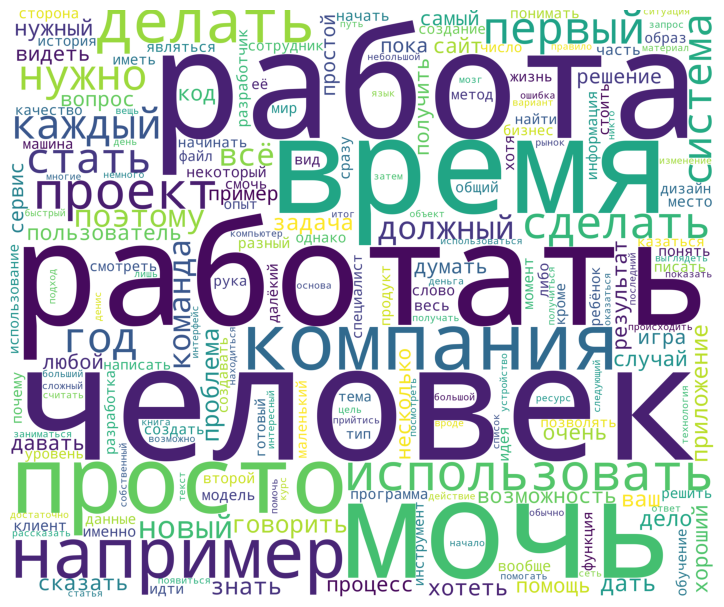

In [35]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [36]:
# Получение облака слов
def get_wordCloud2(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(corpus)
    return wordCloud

<Axes: >

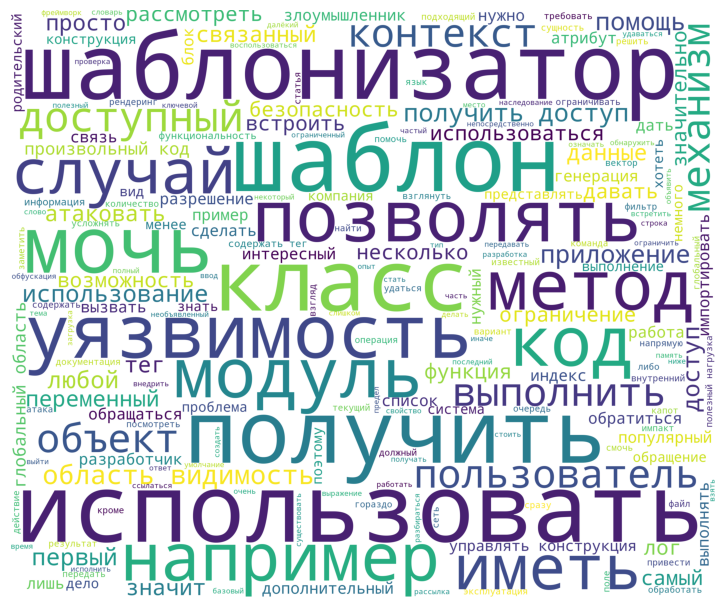

In [37]:
corpus = df['text_lemm'][0]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

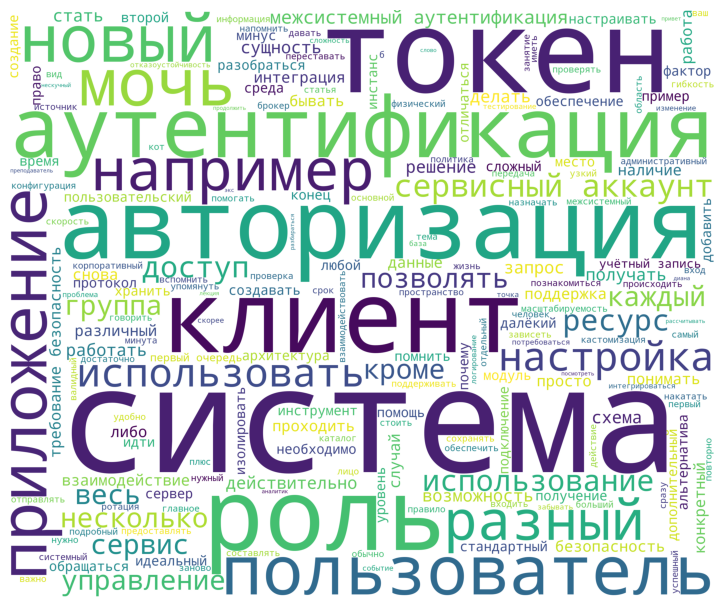

In [38]:
corpus = df['text_lemm'][2]
procWordCloud = get_wordCloud2(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

# Векторизация текстовых данных

### Bag of words

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
df['text_lemm'][0]

'привет хабра звать сергей арефьев специалист отдел анализ защищённость приложение компания статья хотеть подробно раскрыть тема контекст сразу оговориться новый ресерч вектор лишь взять известный посмотреть почему работать полный понимание вопрос рассмотреть импакт атаковать мочь получить использовать пять самый популярный шаблонизатор кроме немного углубиться работа известный поделиться опыт вариант улучшение мочь полезный тестирование несколько слово шаблонизаторахначнуть базовый шаблонизатор применяться встретить шаблонизатор инструмент динамический генерация текстовый данные основа заранее задать шаблон частый встретить веб приложение использоваться рендеринг страница сервер последний несколько год концепция стать менее популярный уступить место клиентский рендеринг формироваться непосредственно браузер помощь фреймворк шаблонизатор прежний применять самый разный задача лишь некоторый генерация автоматический рассылка генерация конфигурационный файл генерация отчёт ⚠ опыт шаблониз

In [41]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [42]:
print(vectorizer.vocabulary_)

{'привет': 35278, 'хабра': 50219, 'звать': 13874, 'сергей': 41864, 'арефьев': 1427, 'специалист': 44034, 'отдел': 28884, 'анализ': 1001, 'защищённость': 13848, 'приложение': 35569, 'компания': 17712, 'статья': 44593, 'хотеть': 50788, 'подробно': 32594, 'раскрыть': 38708, 'тема': 46174, 'контекст': 18014, 'сразу': 44315, 'оговориться': 27506, 'новый': 26423, 'ресерч': 39769, 'вектор': 4582, 'лишь': 20164, 'взять': 5016, 'известный': 14486, 'посмотреть': 34103, 'почему': 34497, 'работать': 37743, 'полный': 33289, 'понимание': 33652, 'вопрос': 5987, 'рассмотреть': 38917, 'импакт': 14841, 'атаковать': 1691, 'мочь': 22963, 'получить': 33456, 'использовать': 15594, 'пять': 37714, 'самый': 40984, 'популярный': 33823, 'шаблонизатор': 51947, 'кроме': 18940, 'немного': 25302, 'углубиться': 47939, 'работа': 37731, 'поделиться': 32271, 'опыт': 28321, 'вариант': 4324, 'улучшение': 48306, 'полезный': 33142, 'тестирование': 46400, 'несколько': 25838, 'слово': 42862, 'шаблонизаторахначнуть': 51948, 'б

In [43]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [44]:
count_matrix.shape

(1227, 256934)

In [45]:
vectorizer.get_feature_names_out()[45000:46000]

array(['добродушно хохотнуть', 'добродушно хохотнуть видеть',
       'добродушный', 'добродушный слегка',
       'добродушный слегка располнеть', 'доброжелатель',
       'доброжелательность', 'доброжелательность поверх',
       'доброжелательность поверх плохо', 'доброжелательный',
       'добропорядочный', 'добропорядочный гражданин', 'добросовестно',
       'добросовестно пройти', 'добросовестный', 'добросовестный думать',
       'добросовестный думать марс', 'доброта', 'добротно', 'добротность',
       'добротность пароль', 'добротность пароль декоративный',
       'добротный', 'добрый', 'добрый вечер', 'добрый викинг',
       'добрый викинг притягивать', 'добрый воля', 'добрый временами',
       'добрый временами река', 'добрый время', 'добрый время сравнение',
       'добрый время сутки', 'добрый день', 'добрый день первый',
       'добрый друг', 'добрый друг прекрасный', 'добрый дядя',
       'добрый намерение', 'добрый намерение подобный', 'добрый половина',
       'добрый путь'

In [46]:
print(count_matrix)

  (0, 163606)	1
  (0, 242915)	1
  (0, 59791)	1
  (0, 200765)	1
  (0, 214944)	1
  (0, 131316)	1
  (0, 2423)	1
  (0, 59655)	1
  (0, 165075)	9
  (0, 79987)	4
  (0, 219810)	3
  (0, 244508)	4
  (0, 145544)	1
  (0, 186334)	1
  (0, 226871)	2
  (0, 82568)	10
  (0, 216888)	3
  (0, 123964)	1
  (0, 116609)	1
  (0, 190973)	1
  (0, 13598)	3
  (0, 89566)	5
  (0, 15985)	2
  (0, 63998)	3
  (0, 156658)	3
  :	:
  (1226, 60237)	1
  (1226, 249641)	1
  (1226, 163762)	1
  (1226, 18966)	1
  (1226, 4315)	1
  (1226, 126002)	1
  (1226, 93077)	1
  (1226, 210392)	1
  (1226, 73621)	1
  (1226, 93604)	1
  (1226, 200918)	1
  (1226, 13334)	1
  (1226, 126049)	1
  (1226, 184579)	1
  (1226, 1202)	1
  (1226, 210391)	1
  (1226, 73616)	1
  (1226, 3407)	1
  (1226, 188398)	1
  (1226, 185493)	1
  (1226, 222562)	1
  (1226, 177916)	1
  (1226, 126050)	1
  (1226, 184933)	1
  (1226, 54951)	1


### TF-IDF

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [49]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 11.2 s
Wall time: 11.2 s


In [50]:
tfidf_matrix.shape

(1227, 10000)

In [51]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['аббревиатура', 'абзац', 'абонент', 'абсолютно', 'абсолютный',
       'абстрагироваться', 'абстрактный', 'абстракция', 'аварийный',
       'авария', 'аватар', 'август', 'август год', 'авиакомпания',
       'авить', 'авто', 'автобус', 'автомат', 'автоматизация',
       'автоматизация тестирование', 'автоматизированный',
       'автоматизировать', 'автоматически', 'автоматический',
       'автомобиль', 'автомобильный', 'автономный', 'автопилот', 'автор',
       'автор книга', 'автор компания', 'автор компания документ',
       'автор песочница', 'авторизация', 'авторитет', 'авторитетный',
       'авторский', 'автотест', 'ага', 'агент', 'агентство', 'агрегатор',
       'агрегатор такси', 'агрегировать', 'агрессивный', 'агрессия', 'ад',
       'адаптация', 'адаптер', 'адаптивный', 'адаптировать',
       'адаптироваться', 'адекватно', 'адекватный', 'адепт', 'админ',
       'административный', 'администратор', 'администрация',
       'администрирование', 'админк', 'адрес', 'адресовать

In [52]:
print(tfidf_matrix)

  (0, 6438)	0.011221202814440808
  (0, 9473)	0.008428590065415341
  (0, 2357)	0.012999408822890742
  (0, 7832)	0.013418996983914284
  (0, 8341)	0.008331611682243919
  (0, 5051)	0.01190621475826042
  (0, 118)	0.009646203942997873
  (0, 2349)	0.021699875719553213
  (0, 6520)	0.06628922759286998
  (0, 3062)	0.023142540608235666
  (0, 8507)	0.021057851943841046
  (0, 9549)	0.02538593884477921
  (0, 5762)	0.012509554199064927
  (0, 7306)	0.015938427740839433
  (0, 8775)	0.015571903308815084
  (0, 3153)	0.11976856636833264
  (0, 8414)	0.022278554514811505
  (0, 4458)	0.0051653131873018515
  (0, 563)	0.049671893980401824
  (0, 3457)	0.04340904133873748
  (0, 661)	0.016492579923652564
  (0, 2486)	0.02787071140940224
  (0, 6135)	0.024488231555423116
  (0, 6214)	0.006964381110609958
  (0, 7072)	0.010235397639312856
  :	:
  (1226, 6748)	0.01983121115961201
  (1226, 4151)	0.01983121115961201
  (1226, 501)	0.020239508853406835
  (1226, 73)	0.020239508853406835
  (1226, 847)	0.020239508853406835
  (

## Кластеризация данных

### K-means

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


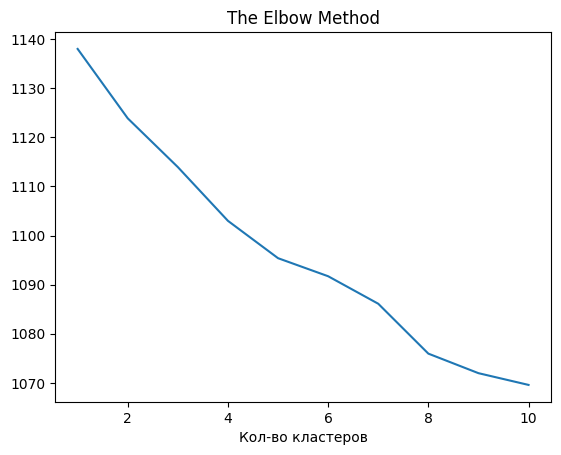

In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Кол-во кластеров')
plt.show()

In [55]:
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, random_state = 42)

In [56]:
kmeans.fit(tfidf_matrix)

KMeans(n_init=10, random_state=42)

In [57]:
pred=kmeans.fit_predict(tfidf_matrix)

cluster
4    361
3    260
6    240
5    118
7    110
1     65
0     60
2     13
Name: count, dtype: int64


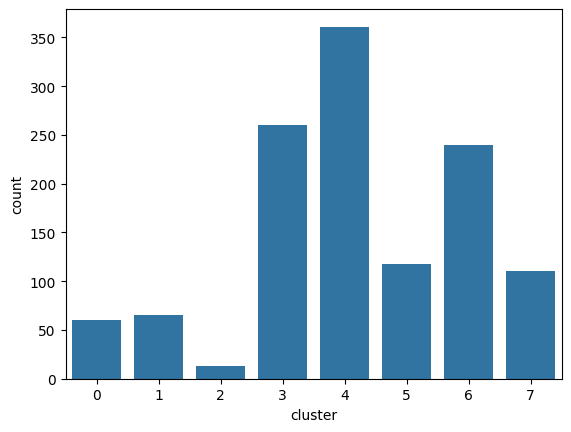

In [58]:
df['cluster'] = pred
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

In [59]:
df.head()

title         nameCompany  \
0  SSTI в Python под микроскопом: разбираем Pytho...             BI.ZONE   
1                Противовирусная жевательная резинка  ua-hosting.company   
2  Keycloak: как упростить аутентификацию и не со...           Clevertec   
3  Из чего сделаны GPU от Т1 Облако? Фотообзор и ...          Холдинг Т1   
4  Фундаментальные науки и ИТ: создание исследова...             Инферит   

                                        description  rating  \
0                                          Компания   76.41   
1     Хостинг-провайдер: серверы в NL до 300 Гбит/с  169.07   
2  Цифровые решения для бизнеса | финтех, логистика   59.14   
3                        Многопрофильный ИТ-холдинг  125.41   
4                                          Компания  229.82   

                                               field        date  \
0  Программное обеспечение, Веб-сервисы, Информац...  2025-04-09   
1  Аппаратное обеспечение, Связь и телекоммуникац...  2025-04-09   
2  Программное обеспечение, Мобильные технологии,...  2025-04-09   
3  Программное обеспечение, Аппаратное обеспечени...  2025-04-09   
4    Программное обеспечение, Аппаратное обеспечение  2025-04-09   

                                             textpub  \
0  Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...   
1    Пандемия, последствия которой до сих пор наб...   
2  Привет! Я Диана, системный аналитик в Cleverte...   
3  Привет, Хабр. На связи команда Т1 Облако. Если...   
4  Развитие информационных технологий — от первых...   

                                            text_new  \
0  привет хабр меня зовут сергей арефьев я специа...   
1   пандемия последствия которой до сих пор наблю...   
2  привет я диана системный аналитик в clevertec ...   
3  привет хабр на связи команда т облако если вы ...   
4  развитие информационных технологий от первых а...   

                                      tokenize_texts  \
0  привет хабр зовут сергей арефьев специалист от...   
1  пандемия последствия которой сих пор наблюдают...   
2  привет диана системный аналитик экс преподават...   
3  привет хабр связи команда облако следите новос...   
4  развитие информационных технологий первых алго...   

                                           text_stem  \
0  привет хабр зовут серг ареф специалист отдел а...   
1  пандем последств котор сих пор наблюда всем ми...   
2  привет диа системн аналитик экс преподавател с...   
3  привет хабр связ команд облак след новост мир ...   
4  развит информацион технолог перв алгоритм нейр...   

                                           text_lemm  cluster  
0  привет хабра звать сергей арефьев специалист о...        3  
1  пандемия последствие сей пора наблюдаться весь...        4  
2  привет диана системный аналитик экс преподават...        3  
3  привет хабра связь команда облако следить ново...        0  
4  развитие информационный технология первый алго...        6

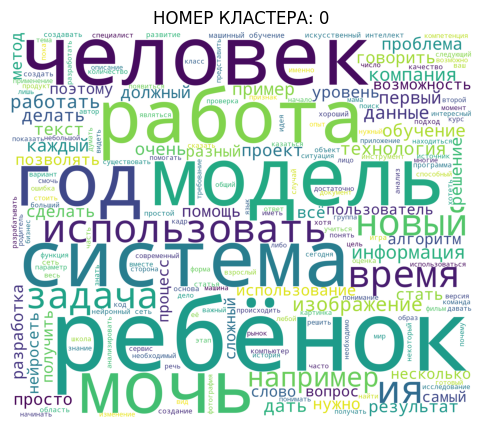

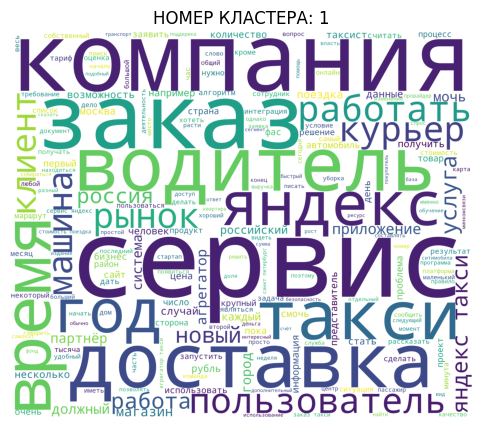

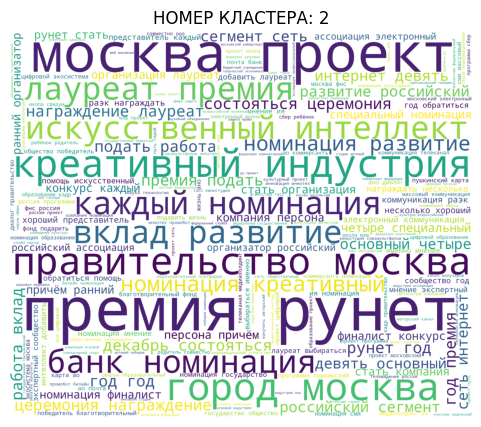

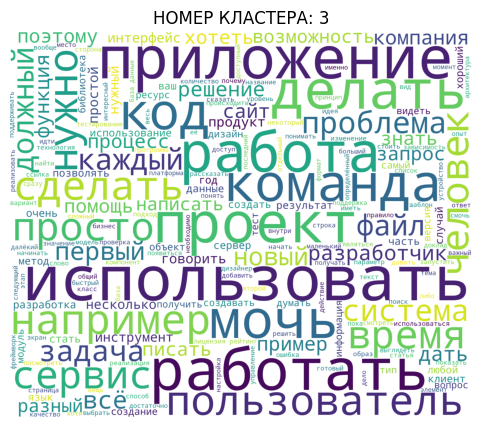

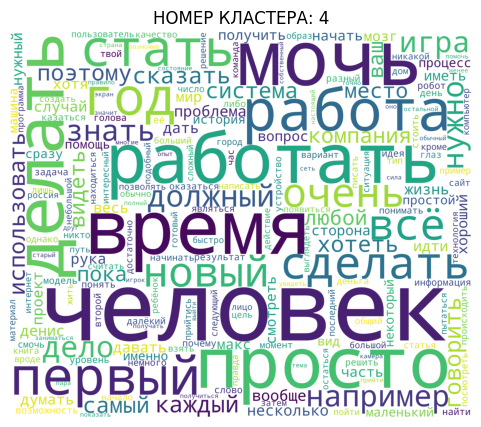

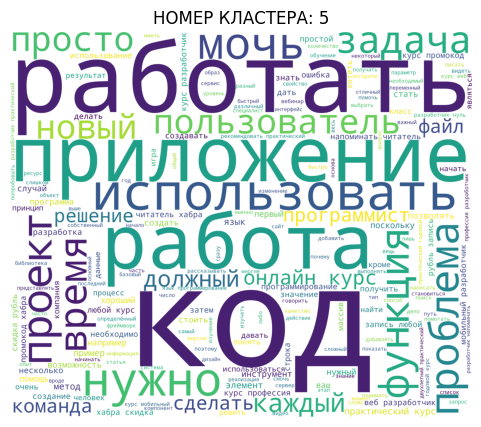

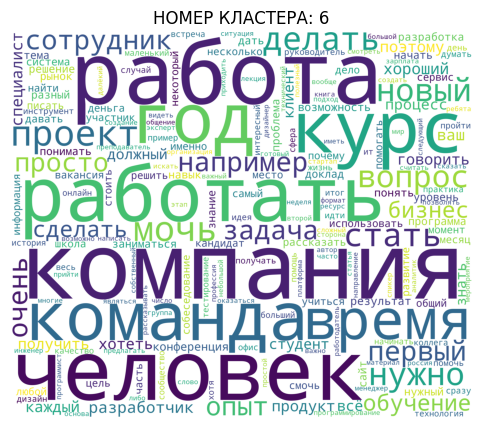

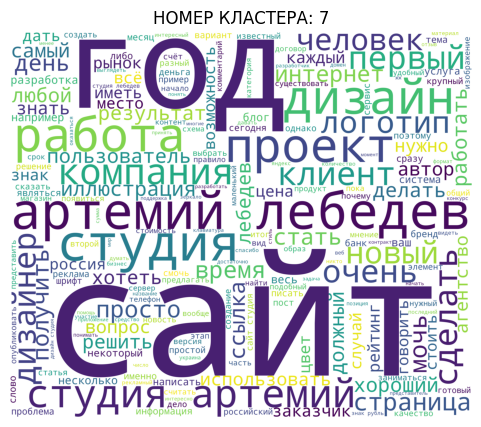

In [60]:
for i in sorted(df['cluster'].unique()):
    corpus = get_corpus(df[df['cluster'] == i].text_lemm.values)
    procWordCloud = get_wordCloud(corpus)
    
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(procWordCloud)
    plt.axis('off')
    plt.title(f'НОМЕР КЛАСТЕРА: {i}')
    plt.subplot(1, 2, 1)

In [61]:
df_cluster_desc = pd.DataFrame()

In [62]:
df_cluster_desc['cluster'] = sorted(df['cluster'].unique())

In [63]:
df_cluster_desc['description'] = ['Развитие', 'Разработки компаний', 'Вклад в развитие', 'Приложения', 'Тайм-менеджемент', "Рабочий код", 'Командный проект', 'Дизайнерское решение']

In [64]:
df_cluster_desc

cluster           description
0        0              Развитие
1        1   Разработки компаний
2        2      Вклад в развитие
3        3            Приложения
4        4      Тайм-менеджемент
5        5           Рабочий код
6        6      Командный проект
7        7  Дизайнерское решение